# Videos and Exercises for Session 11: Regression and Regularization

In this combined teaching module and exercise set, you will learn about linear regression models in a machine learning perspective. We will see how overfitting can arise and how we can tackle it with a modification of the linear regression model.

The structure of this notebook is as follows:
1. Linear Regression Mechanics
2. Overfitting and Underfitting in Linear Regression
    - Exploring Overfitting in Linear Regression
    - A Cure for Overfitting in Linear Regression
3. Modelling Houseprices (Exercise)

## Packages
First, we need to import our standard stuff. Notice that we are not interested in seeing the convergence warning in scikit-learn, so we suppress them for now.

In [1]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

%matplotlib inline

# Part 1: Linear Regression Mechanics
## Implementing and evaluating the gradient decent 
 
Normally we use OLS to estimate linear regression models, but this is only way of solving the problem of minimizing the least squares problem (that minimizes the sum of squared errors). In the video below we show how to implement gradient descent below and compare it along with other approximate solutions to OLS.

You may find PML pp. 310-312, 319-324 useful as background reading.

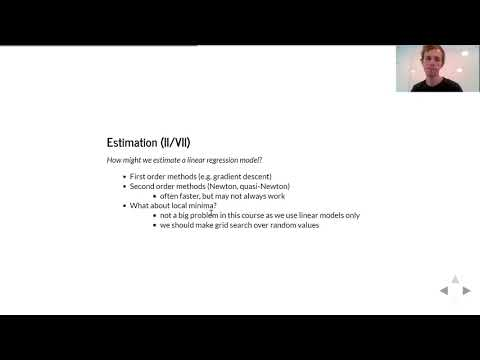

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('zyk0U7-JaH0', width=640, height=360)

We continue straight to an exercise where you are to implement a new estimator that we code up from scratch. We solve the numerical optimization using the gradient decent algorithm. This will be very similar to what we just saw in the video, but we will pay a bit more attention to each step in the process.

Using our algorithm, we will fit it to some data, and compare our own solution to the standard solution from `sklearn`

> **Ex. 11.1.0**: Import the dataset `tips` from the `seaborn`.


*Hint*: use the `load_dataset` method in seaborn

In [3]:
# YOUR CODE HERE

tips = sns.load_dataset('tips')

> **Ex. 11.1.1**: Convert non-numeric variables to dummy variables for each category (remember to leave one column out for each catagorical variable, so you have a reference). Restructure the data so we get a dataset `y` containing the variable tip, and a dataset `X` containing the 
features. 

> *Hint*: You might want to use the `get_dummies` method in pandas, with the `drop_first = True` parameter. 

In [4]:
# YOUR CODE HERE

tips_num = pd.get_dummies(tips, drop_first=True)

X = tips_num.drop('tip', axis = 1)
y = tips_num['tip']


> **Ex. 11.1.2**: Divide the features and target into test and train data. Make the split 50 pct. of each. The split data should be called `X_train`, `X_test`, `y_train`, `y_test`.

> *Hint*: You may use `train_test_split` in `sklearn.model_selection`.

In [5]:
# YOUR CODE HERE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.5)




> **Ex. 11.1.3**: Normalize your features by converting to zero mean and one std. deviation.

> *Hint*: Take a look at `StandardScaler` in `sklearn.preprocessing`. If in doubt about which distribution to scale, you may read [this post](https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-i).

In [6]:
# YOUR CODE HERE

from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)



> **Ex. 11.1.4**: Make a function called `compute_error` to compute the prediction errors given input target `y_`, input features `X_` and input weights `w_`. You should use matrix multiplication.
>
> *Hint:* You can use the net-input fct. from yesterday.



In [7]:
# YOUR CODE HERE

def net_input(X_, w_):
    return X_.dot(w_[1:]) + w_[0]

def compute_error(y_, X_, w_):
    return y_ - net_input(X_, w_)


> **Ex. 11.1.5**: Make a function to update the weights given input target `y_`, input features `X_` and input weights `w_` as well as learning rate, $\eta$, i.e. greek `eta`. You should use matrix multiplication.

In [8]:
# INCLUDED IN ASSIGNMENT 2

In [9]:
# YOUR CODE HERE

def update_weights(y_, X_, w_, eta= 0.001):

    
    error = compute_error(y_, X_, w_)
    w_[0] = w_[0] + eta*error.sum()
    w_[1:] = w_[1:] + eta*X_.T.dot(error)

    return w_
    



> **Ex. 11.1.6**: Use the code below to initialize weights `w` at zero given feature set `X`. Notice how we include an extra weight that includes the bias term. Set the learning rate `eta` to 0.001. Make a loop with 50 iterations where you iteratively apply your weight updating function. 

>```python
w = np.zeros(1+X_train.shape[1])
```

In [10]:
# INCLUDED IN ASSIGNMENT 2

In [11]:
# YOUR CODE HERE

w = np.zeros(1+X_train.shape[1])


for i in range(50):
    update_weights(y_train, X_train, w_= w)
        



In [12]:


w

array([ 2.99960636,  0.55488225,  0.40050892, -0.03620005,  0.03780341,
        0.07810873, -0.09417253,  0.02929463,  0.01220849])

> **Ex. 11.1.7**: Make a function to compute the mean squared error. Alter the loop so it makes 100 iterations and computes the MSE for test and train after each iteration, plot these in one figure. 

> Hint: You can use the following code to check that your model works:
>```python
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
assert((w[1:] - reg.coef_).sum() < 0.01)
```

In [13]:
# YOUR CODE HERE

w = np.zeros(1+X_train.shape[1])

def MSE(y_, X_, w_):
    error_squared = compute_error(y_, X_, w_)**2
    return error_squared.sum() / len(y_)

MSE_train = []
MSE_test = []

for i in range(100):
    w = update_weights(y_train, X_train, w)
    
    MSE_train.append(MSE(y_train, X_train, w))
    MSE_test.append(MSE(y_test, X_test, w))



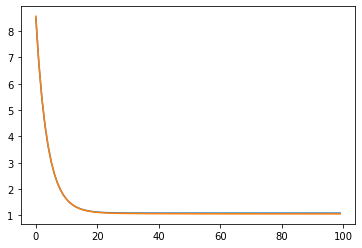

In [14]:
pd.Series(MSE_train).plot()
pd.Series(MSE_test).plot()

The following bonus exercises are for those who have completed all other exercises until now and have a deep motivation for learning more.

> **Ex. 11.1.8 (BONUS)**: Implement your linear regression model as a class.

> A solution is found on p. 320 in Python for Machine Learning.

# Part 2: Overfitting and Underfitting in Linear Regression 

## Exploring Overfitting in Linear Regression
How does overfitting manifest itself in linear regression? In the video below we simulate what happens as make a better and better taylor approximation, i.e. we estimate a polynomial of higher and higher order. Two issues arise simultaneously - one is related to the number of parameters and the to the size of the parameters. 

You may find PML pp. 334-339 useful as background reading.

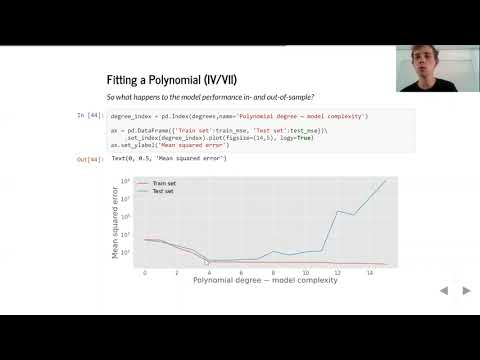

In [15]:
YouTubeVideo('HbeTpK-2oeU', width=640, height=360)

## A Cure for Overfitting in Linear Regression

How do we fix the two issues of excessively large weights/coefficients and too many spurious solutions? The video below provides a solution by directly incorporating these issues into the optimization problem.

You may find PML pp. 73-76, 123-136, 332-334 useful as background reading.

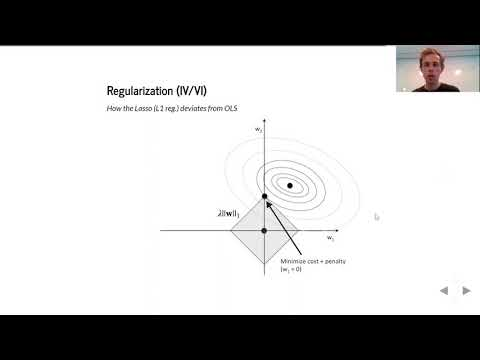

In [16]:
YouTubeVideo('r6a8WFm9jAI', width=640, height=360)

Above we tackled overfitting, but what about ***underfitting***? The video below shows how to address underfitting and also zooms in on some important details about regularization.

You may find PML pp. 73-76, 123-136, 332-334 useful as background reading.

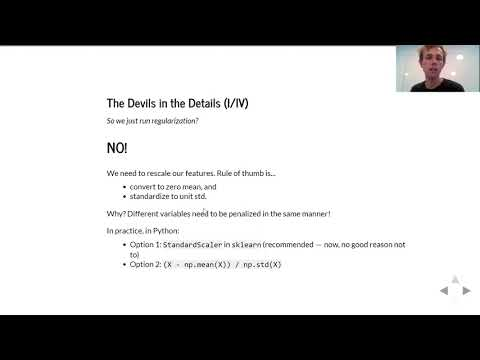

In [17]:
YouTubeVideo('IWBtYT1KI_Q', width=640, height=360)

> **Ex. 11.2.1 (BONUS)**: Is it possible to add a penalty to our linear model above and solve this Lasso model with gradient descent? Is there a simple fix?
>
> *Hint:* Gradient descent essentially relies on a differentiable loss function (read more [here](https://stats.stackexchange.com/questions/177800/why-proximal-gradient-descent-instead-of-plain-subgradient-methods-for-lasso))

# Part 3: Modelling Houseprices
In this example, we will try to predict houseprices using a lot of variable (or features as they are called in Machine Learning). We are going to work with Kaggle's dataset on house prices, see information [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). Kaggle is an organization that hosts competitions in building predictive models.

> **Ex. 11.3.0:** Load the california housing data with scikit-learn using the code below. Now:
> 1. Inspect *cal_house*. How are the data stored?
> 2. Create a pandas DataFrame called *X*, using `data`. Name the columns using `feature_names`.
> 3. Crate a pandas Series called *y* using `target`.
> 4. Make a train test split of equal size.

In [18]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

cal_house = fetch_california_housing()    

# YOUR CODE HERE
X = pd.DataFrame(data=cal_house['data'], columns=cal_house['feature_names']).iloc[:,:-2]
y = cal_house['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.5)





> **Ex.11.3.1**: Generate interactions between all features to third degree (make sure you **exclude** the bias/intercept term). How many variables are there? Will OLS fail? After making interactions, rescale the features to have zero mean, unit std. deviation. Should you use the distribution of the training data to rescale the test data?  

> *Hint 1*: Try importing `PolynomialFeatures` from `sklearn.preprocessing`

> *Hint 2*: If in doubt about which distribution to scale, you may read [this post](https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-i).

In [19]:
# INCLUDED IN ASSIGNMENT 2

In [20]:
# YOUR CODE HERE

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

pol_trans = PolynomialFeatures(degree=3, include_bias=False)
scaler = StandardScaler()

X_train = pol_trans.fit_transform(X_train)
X_train = scaler.fit_transform(X_train)


In [21]:

X_test = pol_trans.transform(X_test)
X_test = scaler.transform(X_test)



> **Ex.11.3.2**: Estimate the Lasso model on the rescaled train data set, using values of $\lambda$ in the range from $10^{-4}$ to $10^4$. For each $\lambda$  calculate and save the Root Mean Squared Error (RMSE) for the rescaled test and train data. Take a look at the fitted coefficients for different sizes of $\lambda$. What happens when $\lambda$ increases? Why?

> *Hint 1*: use `logspace` in numpy to create the range.

> *Hint 2*: read about the `coef_` feature [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso).


In [22]:
# INCLUDED IN ASSIGNMENT 2

In [23]:
# YOUR CODE HERE

from sklearn import linear_model
from sklearn.metrics import mean_squared_error as mse


lambdas = []
RMSE_train = []
RMSE_test = []
coefficients = []

lambda_range = np.logspace(-4, 4, 20, base=10)


for i in lambda_range:

    lasso = linear_model.Lasso(alpha=i)
    reg = lasso.fit(X_train, y_train)

    RMSE_train += [mse(reg.predict(X_train),y_train)]
    RMSE_test += [mse(reg.predict(X_test),y_test)]

    lambdas.append(i)
    coefficients.append(reg.coef_)



In [24]:
df = pd.DataFrame(data={"lambda": lambdas, "RMSE_train" : RMSE_train, "RMSE_test" : RMSE_test, "coef" : coefficients})

print(df[['lambda', 'coef']])

          lambda                                               coef
0       0.000100  [0.25356963810665256, 0.09264384801467603, -0....
1       0.000264  [0.15141767642187282, 0.04220387442733884, -0....
2       0.000695  [0.06277203318191163, -0.0, -0.160188610184495...
3       0.001833  [0.0, -0.05671055172975072, -0.155632062771704...
4       0.004833  [0.6844070362028831, 0.0, -0.2622810526396054,...
5       0.012743  [0.8155855391448342, 0.0, -0.30419371760418656...
6       0.033598  [0.6516042683817258, 0.0, -0.09800475323826043...
7       0.088587  [0.5485790432603755, 0.0, -0.0, -0.0, 0.0, -0....
8       0.233572  [0.4614007696699076, 0.0, -0.0, -0.0, -0.0, -0...
9       0.615848  [0.18086640124704828, 0.0, 0.0, -0.0, -0.0, -0...
10      1.623777  [0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0....
11      4.281332  [0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0....
12     11.288379  [0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0....
13     29.763514  [0.0, 0.0, 0.0, -0.0, -0.0, -0

We see that as $\lambda$ increases the weights tend to decrease, since we penalize larger parameters more and more. Thus making it more optimal to decrease the parameters as much as possible.

> **Ex.11.3.3**: Make a plot with on the x-axis and the RMSE measures on the y-axis. What happens to RMSE for train and test data as $\lambda$ increases? The x-axis should be log scaled. Which one are we interested in minimizing? 

> Bonus: Can you find the lambda that gives the lowest MSE-test score?

In [25]:
# INCLUDED IN ASSIGNMENT 2



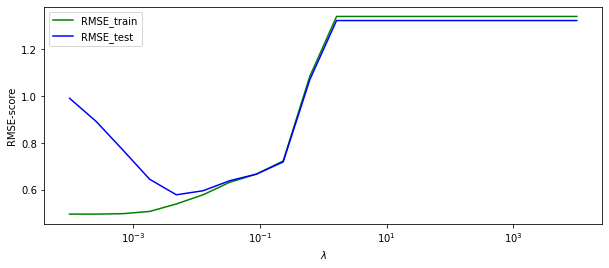

In [29]:
# INCLUDED IN ASSIGNMENT 2# YOUR CODE HERE


fig, ax = plt.subplots(1,1, figsize=(10,4))


ax.plot(lambdas, RMSE_train, "g-", label="RMSE_train")
ax.plot(lambdas, RMSE_test, "b-", label="RMSE_test")
ax.set_xscale('log')
ax.set_ylabel("RMSE-score")
ax.set_xlabel(r'$\lambda$')
ax.legend()


In [ ]:

print(df[df["RMSE_test"] == df["RMSE_test"].min()])

     lambda  RMSE_train  RMSE_test  \
5  0.012743    0.580527   0.607025   

                                                coef  
5  [0.8093519018988287, 0.0, -0.30738378123093363...  
